In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('./datasets/cardata.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.isna().sum()   # It will also return the sum of null values in each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df['Years_diff'] = 2025 - df['Year']

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


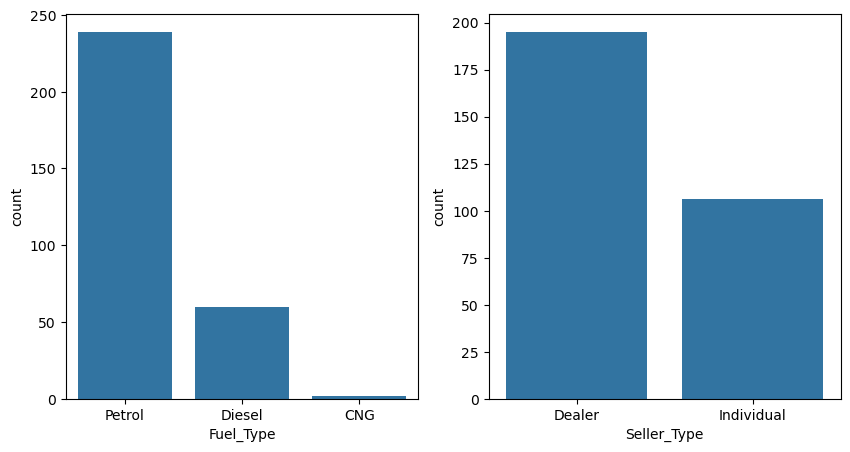

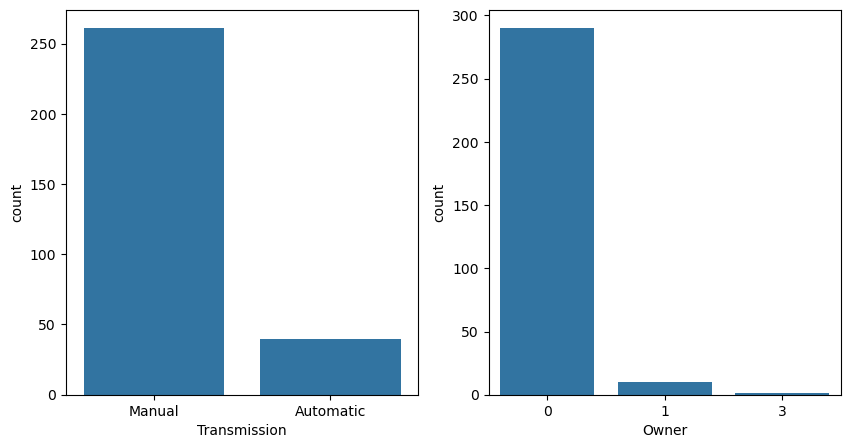

In [12]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i=0
while i<len(categorical_cols):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.countplot(x = categorical_cols[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x = categorical_cols[i], data = df)
    i+=1
    plt.show()

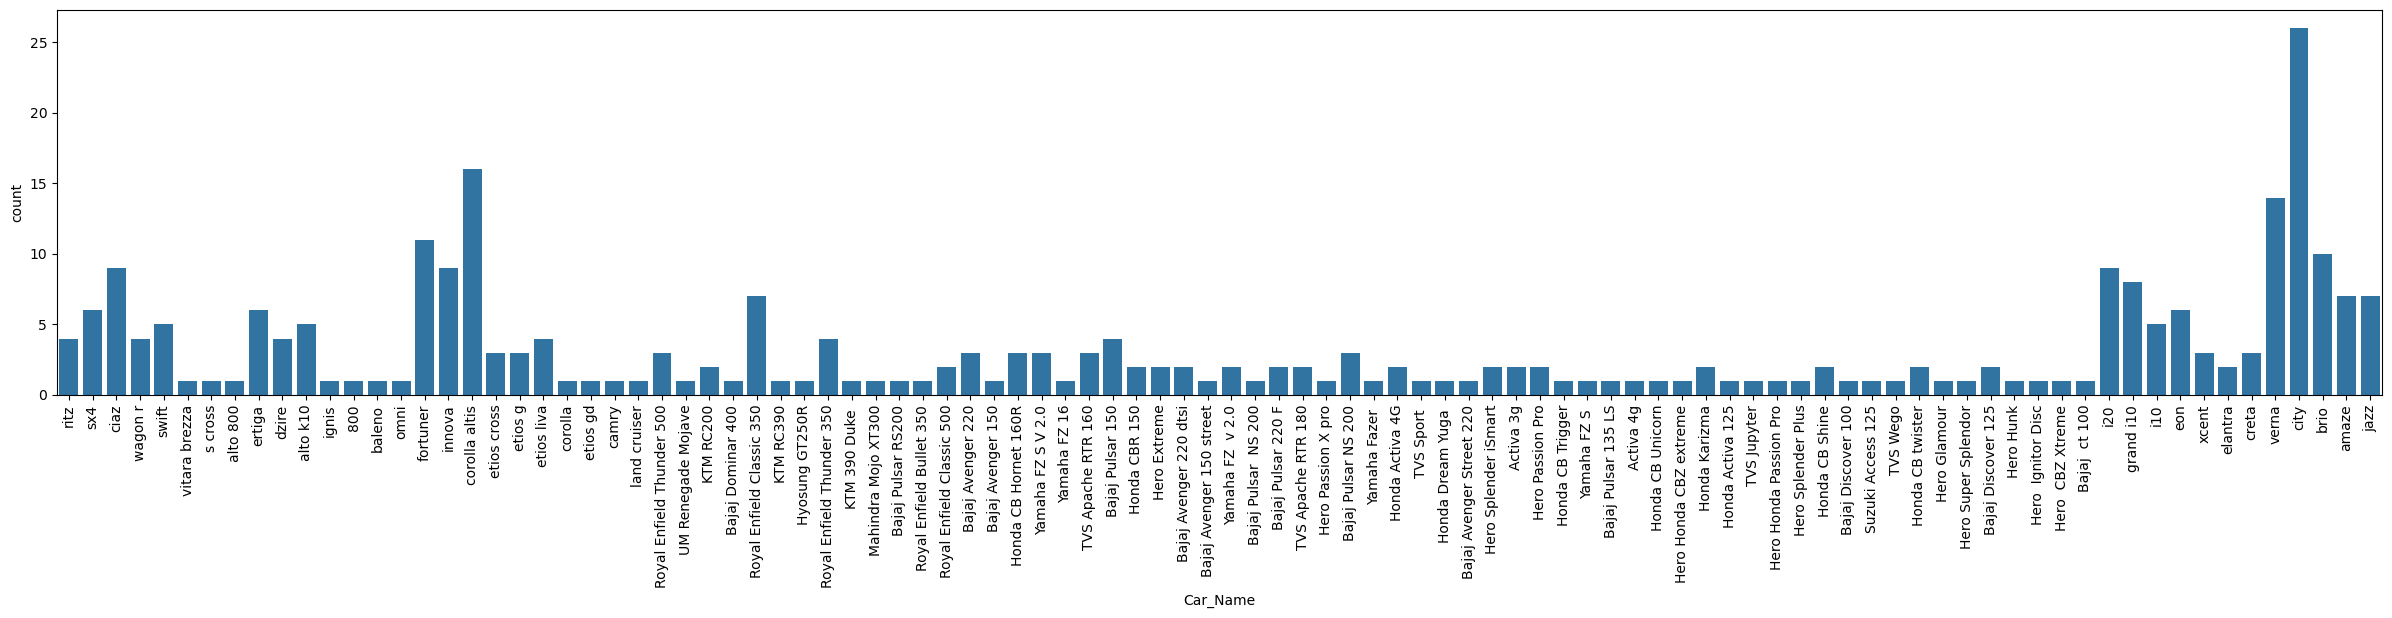

In [13]:
fig = plt.figure(figsize = (30,5))
sns.countplot(x = 'Car_Name', data = df)
plt.xticks(rotation = 90)
plt.show()

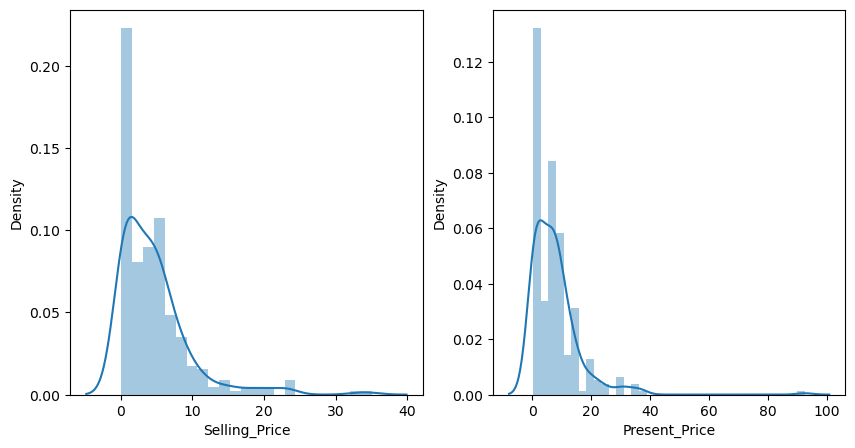

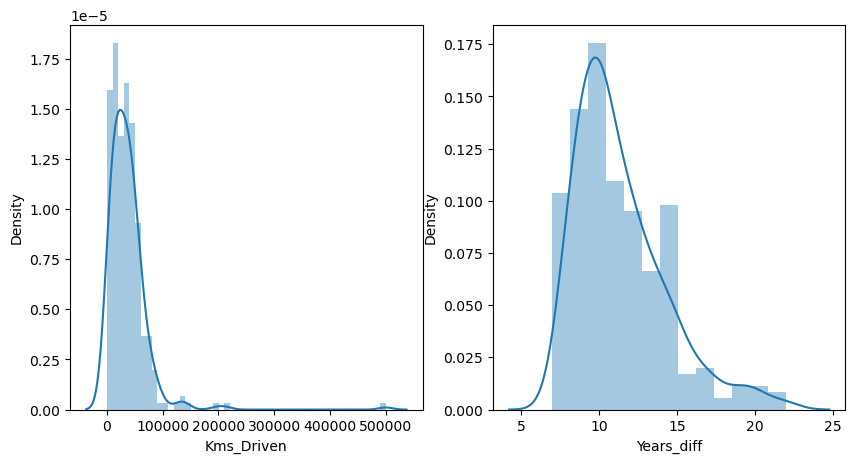

In [14]:
numeric_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Years_diff', ]
i=0
while i<len(numeric_cols):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.distplot(df[numeric_cols[i]])
    i+=1
    plt.subplot(1,2,2)
    sns.distplot(df[numeric_cols[i]])
    i+=1
    plt.show()

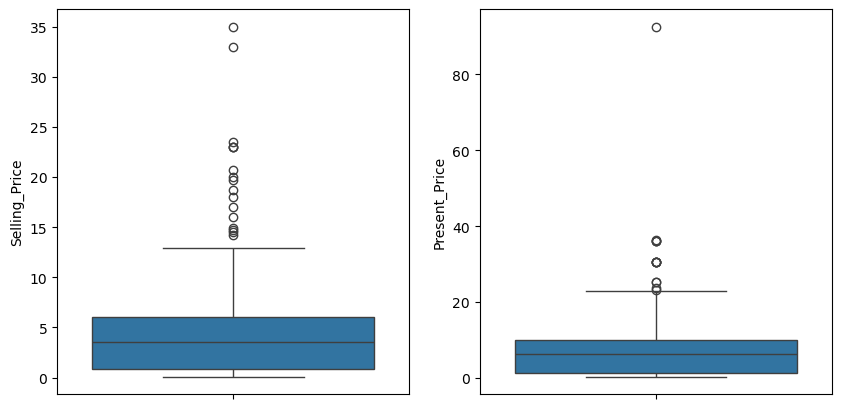

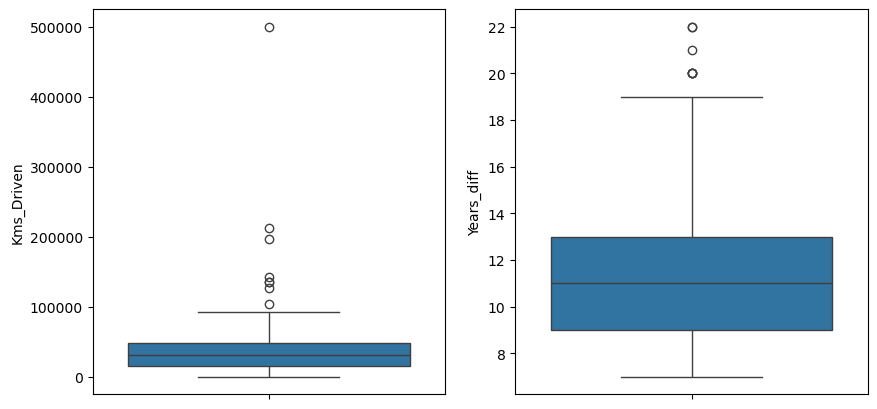

In [15]:
i=0
while i<len(numeric_cols):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.boxplot(df[numeric_cols[i]])
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(df[numeric_cols[i]])
    i+=1
    plt.show()

In [16]:
df[df['Selling_Price']>df['Selling_Price'].quantile(0.99)]   # Univariate Analysis

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_diff
63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0,10
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


In [17]:
df[df['Present_Price']>df['Present_Price'].quantile(0.99)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_diff
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0,8
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0,15


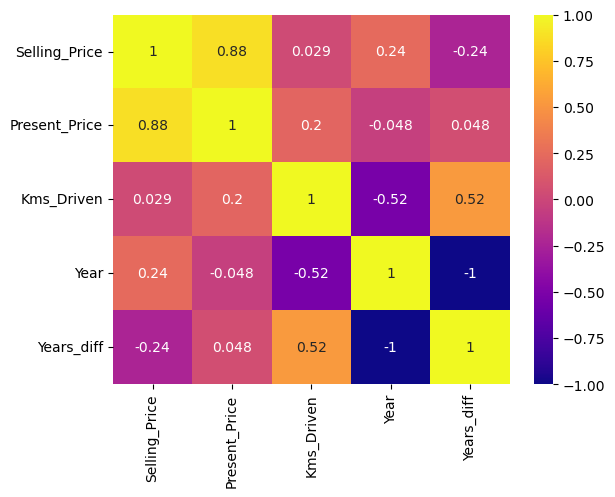

In [18]:
df1 = df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year', 'Years_diff']]
sns.heatmap(df1.corr(), annot = True, cmap = 'plasma')
plt.show()

In [19]:
df1.corrwith(df1['Selling_Price']) # or df1.corr()['Selling_Price]

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Year             0.236141
Years_diff      -0.236141
dtype: float64

In [20]:
df1.pivot_table(values = 'Selling_Price', index = 'Present_Price')

,Selling_Price
Present_Price,
0.32,0.180000
0.47,0.270000
0.48,0.300000
0.51,0.340000
0.52,0.312500
...,...
25.39,21.875000
30.61,18.280000
35.96,20.746667


In [21]:
df.pivot_table(values = 'Selling_Price', index = 'Seller_Type', columns = 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [22]:
df.pivot_table(values = 'Selling_Price', index = 'Seller_Type', columns = 'Fuel_Type', aggfunc='sum')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,6.2,600.71,703.82
Individual,NaN,16.00,76.32


In [23]:
df2 = df.drop(columns = 'Car_Name')   # Creates a new dataframe without column Car_Name

In [24]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_diff
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [25]:
df2 = pd.get_dummies(df2, drop_first=True)

In [26]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,False,True,False,True
1,2013,4.75,9.54,43000,0,12,True,False,False,True
2,2017,7.25,9.85,6900,0,8,False,True,False,True
3,2011,2.85,4.15,5200,0,14,False,True,False,True
4,2014,4.60,6.87,42450,0,11,True,False,False,True


In [27]:
df2['Fuel_Type_Diesel'] = df2['Fuel_Type_Diesel'].map({False : 0, True : 1})
df2['Fuel_Type_Petrol'] = df2['Fuel_Type_Petrol'].map({False : 0, True : 1})
df2['Seller_Type_Individual'] = df2['Seller_Type_Individual'].map({False : 0, True : 1})
df2['Transmission_Manual'] = df2['Transmission_Manual'].map({False : 0, True : 1})


In [28]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1


In [29]:
y = df2['Selling_Price']
x = df2.drop('Selling_Price', axis=1)

In [30]:
x.head()

,Year,Present_Price,Kms_Driven,Owner,Years_diff,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,11,0,1,0,1
1,2013,9.54,43000,0,12,1,0,0,1
2,2017,9.85,6900,0,8,0,1,0,1
3,2011,4.15,5200,0,14,0,1,0,1
4,2014,6.87,42450,0,11,1,0,0,1


In [31]:
x.shape

(301, 9)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [33]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (255, 9)
x_test shape: (46, 9)
y_train shape: (255,)
y_test shape: (46,)


In [34]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [35]:
all = []

def car_price_pred_model(model, model_name):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    all.append(r2_train)
    all.append(r2_test)
    cross_val = cross_val_score(model, x_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    all.append(round(cv_mean,2))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    all.append(round(mae_train,2))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    all.append(round(mae_test,2))
    mse_train = mean_squared_error(y_train, y_pred_train)
    all.append(round(mse_train,2))
    mse_test = mean_squared_error(y_test, y_pred_test)
    all.append(round(mse_test,2))
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].set_title("Residual plot of training data")
    sns.distplot(y_train-y_pred_train, ax=ax[0])
    ax[0].set_xlabel("y_train-y_pred_train")
    ax[1].set_title("Residual plot of testing data")
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel("y_test")
    ax[1].set_ylabel("y_pred_test")
    plt.show()
    return all

Linear Regression Model

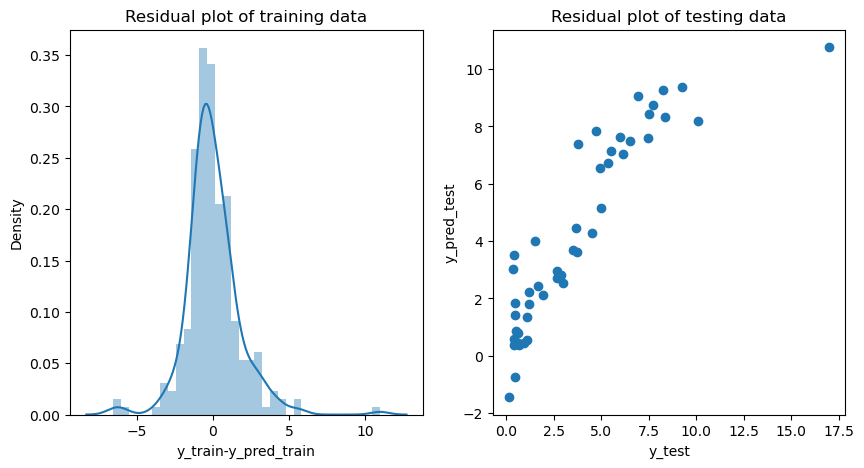

[0.8885407883280818, 0.7874168534979404, 0.85, 1.21, 1.06, 3.13, 2.55]

In [36]:
lr = LinearRegression()
car_price_pred_model(lr,'Linear Regression')

In [37]:
lr.coef_   # Returns B-hat coefficients (B0+B1x1+B2x1+......+Bnxn)

array([ 1.87036273e-01,  4.31593986e-01, -6.82588662e-06, -8.56898637e-01,
       -1.87036273e-01,  2.64434174e+00,  6.58317034e-01, -1.12852529e+00,
       -1.66576069e+00])

Ridge Regression Model (L2)

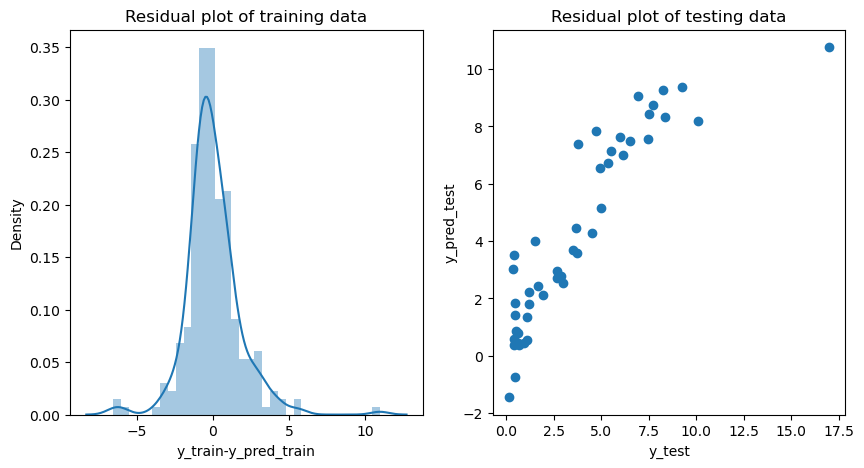

[0.8885407883280818,
 0.7874168534979404,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885403256691514,
 0.7875206947546801,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55]

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha = alpha))
car_price_pred_model(rg_rs,'ridge.pkl')

Lasso Regression Model (L1)

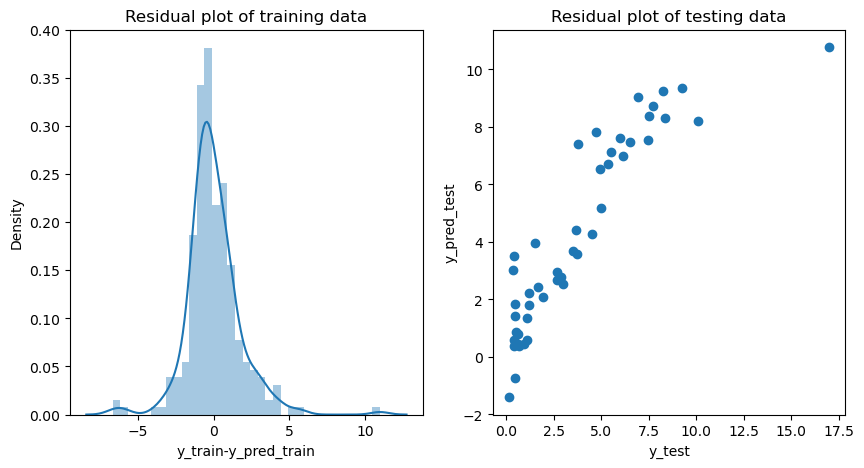

[0.8885407883280818,
 0.7874168534979404,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885403256691514,
 0.7875206947546801,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8884105661009175,
 0.7892499035437972,
 0.83,
 1.22,
 1.06,
 3.13,
 2.53]

In [39]:
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3,num=14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha = alpha))
car_price_pred_model(ls_rs, 'lasso.pkl')

Random Forest Regression Model

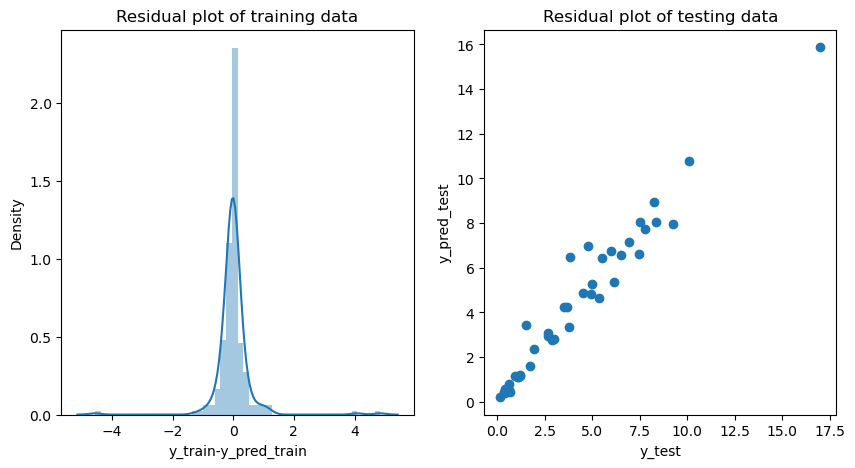

[0.8885407883280818,
 0.7874168534979404,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885403256691514,
 0.7875206947546801,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8884105661009175,
 0.7892499035437972,
 0.83,
 1.22,
 1.06,
 3.13,
 2.53,
 0.9880038073478576,
 0.9539222410527544,
 0.91,
 0.25,
 0.46,
 0.34,
 0.55]

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto', 'sqrt']
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_price_pred_model(rf, 'random_forest.pkl')

In [41]:
rf_rs.fit(x_train, y_train)
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='sqrt', min_samples_split=4,
                      n_estimators=900)


Gradient Boosting Regression Model

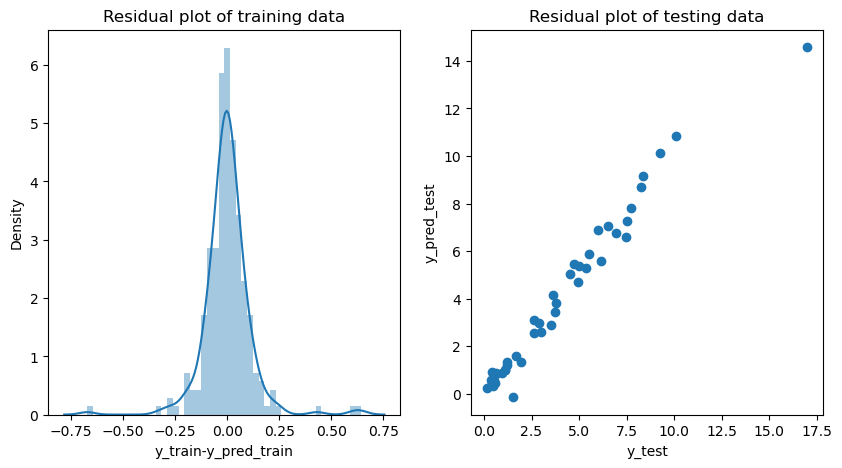

[0.8885407883280818,
 0.7874168534979404,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8885403256691514,
 0.7875206947546801,
 0.85,
 1.21,
 1.06,
 3.13,
 2.55,
 0.8884105661009175,
 0.7892499035437972,
 0.83,
 1.22,
 1.06,
 3.13,
 2.53,
 0.9880038073478576,
 0.9539222410527544,
 0.91,
 0.25,
 0.46,
 0.34,
 0.55,
 0.9995529856746472,
 0.9709533896822031,
 0.88,
 0.07,
 0.39,
 0.01,
 0.35]

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
learning_rate=[0.001,0.01,0.1,0.2]
n_estimators = list(range(500,1000,100))
max_depth = list(range(4,9,4))
min_samples_split = list(range(4,9,2))
min_samples_leaf = [1,2,5,7]
max_features = ['auto', 'sqrt']
param_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_price_pred_model(gb_rs,'gradient_boosting.pkl')